# Transfer Learning with tensorflow: part 1- Feature Extraction
Transfer learning is leveraging a working model's existing architecture and learned patterns for our own problem.

There are 2 main benefits:
1. Can leverage an existing neural network architecture proven to work on problems similar to our own.
2. Can leverage a working neural network architecture which has already learned patterns on similar data to our own, then we can adapt those patterns to our own data.

# 1. Download and get one with the data

In [ ]:
import tensorflow as tf
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!nvidia-smi

Tue Sep 28 05:16:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Get data (10% of 10 food classes from food101 dataset)
import zipfile

!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"

--2021-09-28 05:16:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 64.233.167.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   162MB/s    in 1.0s    

2021-09-28 05:16:01 (162 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
zf = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")

In [ ]:
zf.extractall()

In [ ]:
os.listdir("10_food_classes_10_percent")

['test', 'train']

In [ ]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames):<{4}} directories & {len(filenames):<{5}} images in the {dirpath}")

There are 2    directories & 0     images in the 10_food_classes_10_percent
There are 10   directories & 0     images in the 10_food_classes_10_percent/test
There are 0    directories & 250   images in the 10_food_classes_10_percent/test/ramen
There are 0    directories & 250   images in the 10_food_classes_10_percent/test/chicken_curry
There are 0    directories & 250   images in the 10_food_classes_10_percent/test/pizza
There are 0    directories & 250   images in the 10_food_classes_10_percent/test/hamburger
There are 0    directories & 250   images in the 10_food_classes_10_percent/test/fried_rice
There are 0    directories & 250   images in the 10_food_classes_10_percent/test/grilled_salmon
There are 0    directories & 250   images in the 10_food_classes_10_percent/test/sushi
There are 0    directories & 250   images in the 10_food_classes_10_percent/test/chicken_wings
There are 0    directories & 250   images in the 10_food_classes_10_percent/test/steak
There are 0    directories

In [ ]:
classes = os.listdir("/content/10_food_classes_10_percent/train")
classes

['ramen',
 'chicken_curry',
 'pizza',
 'hamburger',
 'fried_rice',
 'grilled_salmon',
 'sushi',
 'chicken_wings',
 'steak',
 'ice_cream']

### Plot random images

In [ ]:
# Plot random images
def plot_random_image(path, image_class):
  """
  Function to plot & return a radom image
  """
  image_list = os.listdir(path+image_class)    # list of all image files
  random_index = random.randint(0,25)                         # get random index
  random_image = mpimg.imread(os.path.join(path, 
                                           image_class,
                                           image_list[random_index]))  # read the image file indexed at random_index
  plt.axis(False)                                             
  plt.title(image_class +": "+ str(random_image.shape))
  plt.imshow(random_image)                                     # plot the image
  return random_image

In [ ]:
train_dir = "/content/10_food_classes_10_percent/train/"
test_dir = "/content/10_food_classes_10_percent/test/"
# image_class = random.choice(classes)

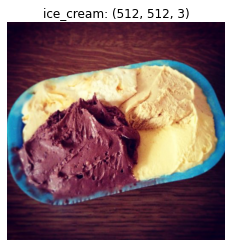

In [ ]:
img1 = plot_random_image(train_dir, random.choice(classes))

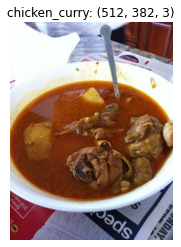

In [ ]:
img2 = plot_random_image(train_dir, random.choice(classes))

# 2. Creating data loaders(prepare inputs)

In [ ]:
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32
EPOCHS = 5

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,)
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size= IMAGE_SHAPE,
                                               batch_size= BATCH_SIZE,
                                               class_mode= "categorical")
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data= test_datagen.flow_from_directory(test_dir,
                                             target_size= IMAGE_SHAPE,
                                             batch_size = BATCH_SIZE,
                                             class_mode= "categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
len(train_data_10_percent), len(test_data)

(24, 79)

# Introducing Callbacks in tensorflow

Callbacks are extra functionality that you can add to your models to be performed during or after training. Some of the most popular callbacks are:

* Tracking the experiments with the **TensorBoard** callback
* Model checkpointing with **ModelCheckpoint** callback
* Stopping a model from training (before it trains too long & overfits) with the **EarlyStopping** callback

In [ ]:
# Create TensorBoard Callback (functionized because we need to create a new one for each model)
import datetime

def create_tensoboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to {tensorboard_callback}")
  return tensorboard_callback

### **NOTE**: You can customize the directory where your TensorBoard logs (model training metrics) get saved to whatever you like. The log_dir parameter that we've created above is only one option.

# Creating Models using TensorFlow Hub

In the past we have used Tensorflow to create our own models layer by layer from scratch.
Now we're going to do a similar process, except majority of our model's layers are going to come from TensorFlow Hub. We can access pretrained models on: https://www.tensorflow.org/hub

Browsing the TensorFlow Hub page & sorting for image classification & image featire vector, we found the following feature vector model link: https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

In [ ]:
# Let's compare following two models:

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
# Importing dependencies

import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# Let's make a create_model() to create a model from url

def create_model(model_url, num_classes=10):
  """
  Takes a TensorFlow Hub URL & creates a Keras Sequential Model with it.

  Parameters:
   model_url (str): A TensorFlow Hub Feature Extraction URL.

   num_classes (int): Number of output neurons in the output layer, 
                      should be equal to number of target classes(default 10).

   Returns:
    An un-compiled Leras Sequential Model with model_url as feature extractor layer
    & Dense layer with num_classes output neurons.
  """
  # Download the pre-trained model and save it as Sequential Keras Layer

  feature_extractor_layer = hub.KerasLayer(model_url, 
                                           trainable=False,  # Freeze the already learned patterns
                                           name="feature_extraction_layer",
                                           input_shape=IMAGE_SHAPE+(3,)
                                           )
  # Create our own model

  model = tf.keras.Sequential([
          feature_extractor_layer,
          layers.Dense(units=num_classes, activation="softmax", name="output_layer")
  ])

  return model

## Creating & testing ResNet TensorFlow Hub feature Extraction model

In [ ]:
resnet_model = create_model(resnet_url, len(classes)) # train_data_10_percent.num_classes

In [ ]:
# copile our resnet model

resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy']
                     )

In [ ]:
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=EPOCHS,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensoboard_callback("tensorflow_hub",
                                                                        "resnet50v2")])

Saving TensorBoard log files to <keras.callbacks.TensorBoard object at 0x7fa27f92c310>
Epoch 1/5
24/24 [==============================] - 22s 955ms/step - loss: 0.3825 - accuracy: 0.9213 - val_loss: 0.6814 - val_accuracy: 0.7788
Epoch 2/5
24/24 [==============================] - 22s 922ms/step - loss: 0.3123 - accuracy: 0.9387 - val_loss: 0.6638 - val_accuracy: 0.7776
Epoch 3/5
24/24 [==============================] - 21s 918ms/step - loss: 0.2653 - accuracy: 0.9533 - val_loss: 0.6525 - val_accuracy: 0.7832
Epoch 4/5
24/24 [==============================] - 21s 919ms/step - loss: 0.2236 - accuracy: 0.9707 - val_loss: 0.6410 - val_accuracy: 0.7916
Epoch 5/5
24/24 [==============================] - 26s 1s/step - loss: 0.1895 - accuracy: 0.9787 - val_loss: 0.6383 - val_accuracy: 0.7924


WOW!

That is incredible! Our transfer learning feature extractor model out performed ALL of the previous models we built by hand substantially & in quicker training time & with only 10 percent of trainng data.

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
# Let's create a function to plot loss curves
import pandas as pd
def plot_loss_curves(history):
  epochs = range(len(history.history['loss']))
  #history_df = pd.DataFrame(history.history)

  train_loss = history.history['loss'] #history_df['loss']
  val_loss = history.history['val_loss'] #history_df['val_loss']

  train_acc = history.history['accuracy'] #history_df['accuracy']
  val_acc = history.history['val_accuracy'] #history_df['val_accuracy']

  plt.figure()
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.plot(epochs, train_loss, label="Training loss")
  plt.plot(epochs, val_loss, label="Validation Loss")
  plt.legend()

  plt.figure()
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.plot(epochs, train_acc, label="Training Accuracy")
  plt.plot(epochs, val_acc, label="Validation Accuracy")
  plt.legend();

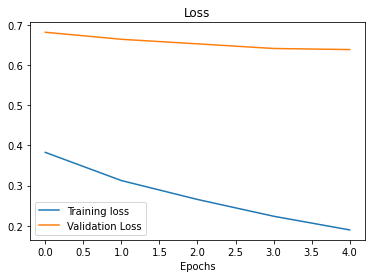

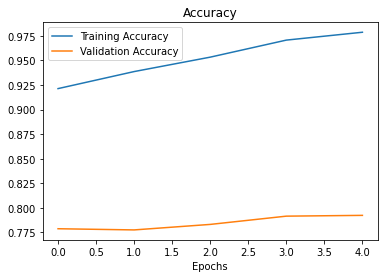

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
history_df = pd.DataFrame(resnet_history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.382498,0.921333,0.681383,0.7788
1,0.312338,0.938667,0.663837,0.7776
2,0.265315,0.953333,0.652523,0.7832
3,0.223583,0.970667,0.640964,0.7916
4,0.189528,0.978667,0.638279,0.7924


## Creating & testing EfficientNet B0 TensorFlow Hub feature extraction model.

In [ ]:
efficient_model = create_model(efficientnet_url)

In [ ]:
efficient_model.compile(loss="categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['accuracy'])

In [ ]:
efficient_history = efficient_model.fit(train_data_10_percent,
                                        epochs=EPOCHS,
                                        steps_per_epoch=len(train_data_10_percent),
                                        validation_data=test_data,
                                        validation_steps=len(test_data),
                                        callbacks=[create_tensoboard_callback("tensorflow_hub",
                                                                              "efficientnetB0")])

Saving TensorBoard log files to <keras.callbacks.TensorBoard object at 0x7fa18ba4f610>
Epoch 1/5
24/24 [==============================] - 34s 1s/step - loss: 1.8563 - accuracy: 0.3987 - val_loss: 1.2992 - val_accuracy: 0.7232
Epoch 2/5
24/24 [==============================] - 19s 818ms/step - loss: 1.0691 - accuracy: 0.7760 - val_loss: 0.8686 - val_accuracy: 0.8180
Epoch 3/5
24/24 [==============================] - 19s 816ms/step - loss: 0.7579 - accuracy: 0.8240 - val_loss: 0.7070 - val_accuracy: 0.8348
Epoch 4/5
24/24 [==============================] - 19s 812ms/step - loss: 0.6117 - accuracy: 0.8640 - val_loss: 0.6164 - val_accuracy: 0.8560
Epoch 5/5
24/24 [==============================] - 25s 1s/step - loss: 0.5176 - accuracy: 0.8840 - val_loss: 0.5661 - val_accuracy: 0.8556


In [ ]:
efficient_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


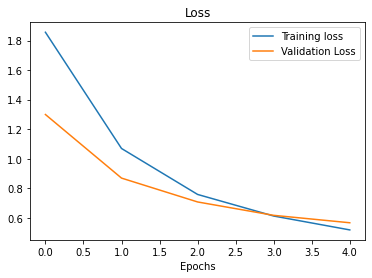

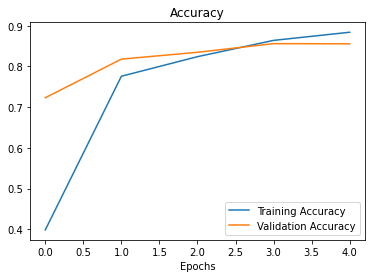

In [ ]:
plot_loss_curves(efficient_history)

In [ ]:
# number of layers in EfficientNetB0 
len(efficient_model.layers[0].weights)

309

## Different types of transfer learning:

* **"AS IS"** transfer learning - using an existing model with no changes whatsoever (eg. using ImageNet model on 1000 ImageNet classes, none of your own)

* **"Feature Extraction"** transfer learning - use pre-trained patterns of an existing model (eg. EfficientNetB0 trained on ImageNet) and adjust the output layer for your own problem (eg. 1000 classes-> 10 classes of food)

* **"Fine Tuning"** trasnfer learning - use the pre-learned patterns of an existing model & "fine-tune" many or all of the underlying layers including new output layers)

# Comparing our models' results using TensorBoard

**NOTE**: When you upload things to TensorBoard.dev, you make them public. So, if you're running private experiments do not upload them to TensorBoard.dev

In [ ]:
# TensorBoard comes inbuilt with Colab
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
 --name "EfficientNetB0 Vs ResNet50V2 (SAK_1193)"\
 --description "Comparing two TF Hub feature etraction model architectures using 10% of training data"\
 --one_shot

2021-09-28 09:08:24.863820: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 09:08:24.895547: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 09:08:24.896049: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privac

Our TensorBoard experiments are uploaded here: https://tensorboard.dev/experiment/YbL5BYL3TqC5EV6fliPW2A/

In [ ]:
# Check out the TensorBoard experiments you have 
!tensorboard dev list

2021-09-28 09:15:53.947236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 09:15:53.956447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 09:15:53.956949: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/YbL5BYL3TqC5EV6fliPW2A/
	Name                 EfficientNetB0 Vs ResNet50V2 (SAK_1193)
	Description          Comparing two TF Hub feature etraction model architectures using 10% of training data
	Id                   YbL5BYL3TqC5EV6fliPW2A
	Created              2021-09-28 09:09:51 (6 minutes ago)
	Updated

In [ ]:
# deleting an experiment
# !tensorboard dev delete --experiment_id YbL5BYL3TqC5EV6fliPW2A